In [1]:
import os
from ultralytics import YOLO
from preprocessing.dedup import dedup_images_from_folder
from preprocessing.preprocess import dataset_statistics, crop_and_save_knees,show_yolo_performance


In [2]:
## to save runtime changes to False
DEDUP = True
CROP_YOLO = True
TRAIN_MODELS = True

In [3]:
DONT_USE_YOLO = False

In [4]:
my_data_dir = r"data\kaggel_data"
categories = ["Normal", "Osteopenia", "Osteoporosis"]



📊 **Dataset Statistics After step 0:**
  📂 Normal: 780 images
  📂 Osteopenia: 374 images
  📂 Osteoporosis: 793 images


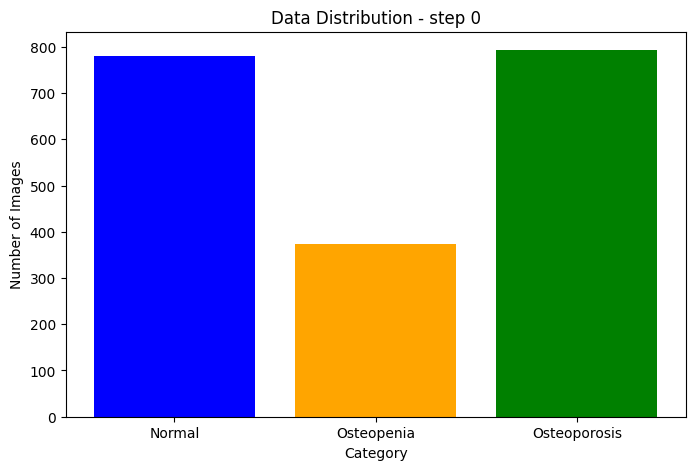

In [5]:
dataset_statistics(my_data_dir, "step 0",categories)

# run over all the data and find duplicates

In [6]:
from imagededup.methods import PHash
from imagededup.utils import plot_duplicates
import os
import shutil


def dedup_images_from_folder(image_dir, th=5):

    copy_to_two_folders(image_dir)
    image_dir = os.path.join(image_dir, "no_dups_data")
    phasher = PHash()
    # Generate encodings for all images in an image directory
    encodings = phasher.encode_images(image_dir, recursive=True)

    # Find duplicates using the generated encodings
    duplicates = phasher.find_duplicates(
        encoding_map=encodings, max_distance_threshold=th, recursive=True
    )
    non_empty_count_1 = sum(
        1 for v in duplicates.values() if len(v) > 0
    )  # “if v” is True when the list is non‑empty
    print(
        f"there are {len(duplicates) - non_empty_count_1 } unique images from {len(duplicates)} images"
    )
    most_dups = 0
    for i in range(1, 10):
        non_empty_count = sum(
            1 for v in duplicates.values() if len(v) == i
        )  # “if v” is True when the list is non‑empty
        print(f"there are {round(non_empty_count/i+1)-1} images with {i+1} shows")
        if non_empty_count > 0:
            most_dups += 1
    non_empty_count = sum(
        1 for v in duplicates.values() if len(v) > 10
    )  # “if v” is True when the list is non‑empty
    print(f"there are {non_empty_count} images with more than {10} shows")
    filtered_dict = {k: v for k, v in duplicates.items() if len(v) > most_dups - 1}
    print(most_dups)
    duplicates_list = []
    if most_dups > 0:
        first_key = next(iter(filtered_dict))  # ➜ 'a'
        first_value = filtered_dict[first_key][0]

        plot_duplicates(
            image_dir=image_dir, duplicate_map=duplicates, filename=first_value
        )
        duplicates_list = phasher.find_duplicates_to_remove(
            encoding_map=encodings, max_distance_threshold=th, recursive=True
        )
    print(f"there are {duplicates_list.__len__()} to remove")
    os.path.join(image_dir, "train")
    images_to_remove = duplicates_list

    # Paths
    source_folder = os.path.join(image_dir)  # Folder containing the images

    # del files
    for image_name in images_to_remove:
        source_path = os.path.join(source_folder, image_name)

        try:
            # Ensure the destination subfolder exists
            if os.path.exists(source_path):
                os.remove(source_path)
            else:
                print(f"File not found: {image_name}")
        except Exception as e:
            print(f"Error moving {image_name}: {e}")
    return duplicates

def copy_to_two_folders(source_folder):
    """
    Copies all files and subfolders from source_folder into BOTH
    source_folder/original_data and source_folder/processed_data.
    """
    # ✅ Create target folders INSIDE source_folder
    # original_folder = os.path.join(source_folder, "original_data")
    processed_folder = os.path.join(source_folder, "no_dups_data")

    # os.makedirs(original_folder, exist_ok=True)
    os.makedirs(processed_folder, exist_ok=True)

    # ✅ Iterate through items in source_folder
    for item in os.listdir(source_folder):
        src_path = os.path.join(source_folder, item)

        # ✅ Skip copying into itself
        if item in ["no_dups_data"]:
            continue

        # dst_original = os.path.join(original_folder, item)
        dst_processed = os.path.join(processed_folder, item)

        if os.path.isdir(src_path):
            # shutil.copytree(src_path, dst_original, dirs_exist_ok=True)
            shutil.copytree(src_path, dst_processed, dirs_exist_ok=True)
        else:
            # shutil.copy2(src_path, dst_original)
            shutil.copy2(src_path, dst_processed)

    print(f"✅ All files & folders copied to '{processed_folder}'")


✅ All files & folders copied to 'data\kaggel_data\no_dups_data'


2025-08-02 20:40:16,224: INFO Start: Calculating hashes...
100%|██████████| 1947/1947 [01:41<00:00, 19.21it/s]
2025-08-02 20:42:02,931: INFO End: Calculating hashes!
c:\Users\e0l07sq\Anaconda3\envs\osteo_gpu\lib\site-packages\imagededup\methods\hashing.py:315: SyntaxWarning: recursive parameter is irrelevant when using encodings.
  warnings.warn('recursive parameter is irrelevant when using encodings.', SyntaxWarning)
c:\Users\e0l07sq\Anaconda3\envs\osteo_gpu\lib\site-packages\imagededup\methods\hashing.py:317: RuntimeWarning: Parameter num_enc_workers has no effect since encodings are already provided
  warnings.warn('Parameter num_enc_workers has no effect since encodings are already provided', RuntimeWarning)
2025-08-02 20:42:02,946: INFO Start: Evaluating hamming distances for getting duplicates
2025-08-02 20:42:02,946: INFO Start: Retrieving duplicates using BKTree algorithm
100%|██████████| 1947/1947 [00:49<00:00, 39.54it/s]
2025-08-02 20:42:56,381: INFO End: Retrieving duplicate

there are 120 unique images from 1947 images
there are 720 images with 2 shows
there are 43 images with 3 shows
there are 216 images with 4 shows
there are 59 images with 5 shows
there are 7 images with 6 shows
there are 0 images with 7 shows
there are 5 images with 8 shows
there are 1 images with 9 shows
there are 7 images with 10 shows
there are 0 images with more than 10 shows
8


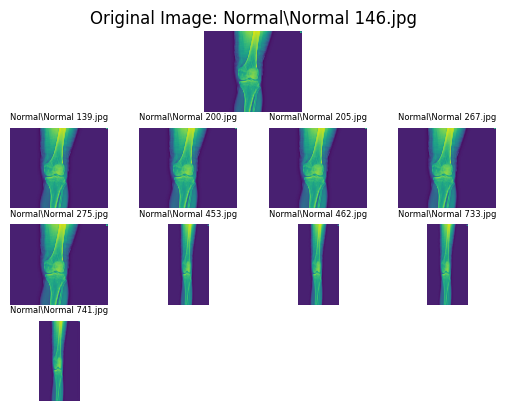

2025-08-02 20:42:57,547: INFO Start: Evaluating hamming distances for getting duplicates
2025-08-02 20:42:57,547: INFO Start: Retrieving duplicates using BKTree algorithm
100%|██████████| 1947/1947 [00:49<00:00, 39.15it/s]
2025-08-02 20:43:51,738: INFO End: Retrieving duplicates using BKTree algorithm
2025-08-02 20:43:51,738: INFO End: Evaluating hamming distances for getting duplicates


there are 1212 to remove


In [7]:
duplicates = dedup_images_from_folder(my_data_dir,0)


In [8]:

def find_multiclass_images(image_dict):
    multiclass_images = []

    for key_path, value_paths in image_dict.items():
        if not value_paths:
            continue  # Skip if no values
        
        # Extract class of the key
        key_class = os.path.dirname(key_path).split("\\")[-1]  # Handles Windows paths like 'Normal\\file.jpg'
        
        # Extract classes of all values
        value_classes = [os.path.dirname(val).split("\\")[-1] for val in value_paths]
        
        # If ANY value has a different class than the key, mark it
        if any(val_class != key_class for val_class in value_classes):
            multiclass_images.append(key_path)
            multiclass_images.extend(value_paths)

    return multiclass_images


multiclass_images = find_multiclass_images(duplicates)
print(multiclass_images)


['Normal\\Normal 104.JPEG', 'Normal\\Normal 229.JPEG', 'Normal\\Normal 426.jpg', 'Normal\\Normal 708.jpg', 'Osteoporosis\\Osteoporosis 120.JPEG', 'Osteoporosis\\Osteoporosis 211.JPEG', 'Osteoporosis\\Osteoporosis 553.jpg', 'Osteoporosis\\Osteoporosis 709.jpg', 'Normal\\Normal 109.jpg', 'Normal\\Normal 234.jpg', 'Osteoporosis\\Osteoporosis 146.jpg', 'Osteoporosis\\Osteoporosis 239.jpg', 'Osteoporosis\\Osteoporosis 390.jpg', 'Osteoporosis\\Osteoporosis 416.jpg', 'Normal\\Normal 113.jpg', 'Normal\\Normal 239.jpg', 'Normal\\Normal 586.jpg', 'Normal\\Normal 685.jpg', 'Osteoporosis\\Osteoporosis 391.jpg', 'Normal\\Normal 117.jpg', 'Normal\\Normal 243.jpg', 'Osteoporosis\\Osteoporosis 403.jpg', 'Normal\\Normal 118.jpg', 'Normal\\Normal 244.jpg', 'Normal\\Normal 589.jpg', 'Normal\\Normal 688.jpg', 'Osteoporosis\\Osteoporosis 405.jpg', 'Normal\\Normal 119.jpg', 'Normal\\Normal 245.jpg', 'Normal\\Normal 590.jpg', 'Normal\\Normal 689.jpg', 'Osteoporosis\\Osteoporosis 399.jpg', 'Normal\\Normal 134

In [9]:
import os
import cv2

def collect_duplicates_to_delete(image_dict):
    duplicates_to_delete = []

    for key_path, value_paths in image_dict.items():
        if not value_paths:
            continue  # skip keys with no values

        # Extract class of key and all values
        key_class = os.path.dirname(key_path).split("\\")[-1]
        value_classes = [os.path.dirname(v).split("\\")[-1] for v in value_paths]

        # Only proceed if all values are from the same class as the key
        if all(val_class == key_class for val_class in value_classes):
            all_images = [key_path] + value_paths

            # Measure resolutions
            resolutions = {}
            for img_path in all_images:
                img = cv2.imread(os.path.join(my_data_dir,img_path))
                if img is None:
                    continue  # skip unreadable files
                h, w = img.shape[:2]
                resolutions[img_path] = w * h  # resolution = width x height

            if not resolutions:
                continue  # skip if no valid images were read

            # Find image with max resolution
            keep_image = max(resolutions, key=resolutions.get)

            # Add everything except the one to keep
            for img in all_images:
                if img != keep_image:
                    duplicates_to_delete.append(img)

    return duplicates_to_delete


# Example usage

duplicates_to_delete = collect_duplicates_to_delete(duplicates)
print(duplicates_to_delete)


['Normal\\Normal 223.png', 'Normal\\Normal 224.png', 'Normal\\Normal 512.jpg', 'Normal\\Normal 618.jpg', 'Normal\\Normal 225.jpg', 'Normal\\Normal 226.jpg', 'Normal\\Normal 227.jpg', 'Normal\\Normal 578.jpg', 'Normal\\Normal 678.jpg', 'Normal\\Normal 228.JPEG', 'Normal\\Normal 230.jpg', 'Normal\\Normal 231.jpg', 'Normal\\Normal 580.jpg', 'Normal\\Normal 680.jpg', 'Normal\\Normal 232.jpg', 'Normal\\Normal 581.jpg', 'Normal\\Normal 681.jpg', 'Normal\\Normal 233.jpg', 'Normal\\Normal 235.png', 'Normal\\Normal 551.jpg', 'Normal\\Normal 600.jpg', 'Normal\\Normal 236.jpg', 'Normal\\Normal 237.png', 'Normal\\Normal 238.png', 'Normal\\Normal 428.jpg', 'Normal\\Normal 710.jpg', 'Normal\\Normal 240.jpg', 'Normal\\Normal 241.JPEG', 'Normal\\Normal 242.JPEG', 'Normal\\Normal 430.jpg', 'Normal\\Normal 712.jpg', 'Normal\\Normal 246.jpg', 'Normal\\Normal 247.jpg', 'Normal\\Normal 431.jpg', 'Normal\\Normal 713.jpg', 'Normal\\Normal 248.JPEG', 'Normal\\Normal 249.png', 'Normal\\Normal 435.jpg', 'Normal

In [10]:
print(len(multiclass_images))
print(len(duplicates_to_delete))


2000
3158


In [11]:
all_to_del = []
all_to_del.extend(duplicates_to_delete)
all_to_del.extend(multiclass_images)
print(len(all_to_del))


5158


In [12]:
def unique_list(lst):
    seen = set()
    unique = []
    for item in lst:
        if item not in seen:
            seen.add(item)
            unique.append(item)
    return unique

unique_all_to_del = unique_list(all_to_del)
len(unique_all_to_del)

1827

In [13]:
unique_all_to_del

['Normal\\Normal 223.png',
 'Normal\\Normal 224.png',
 'Normal\\Normal 512.jpg',
 'Normal\\Normal 618.jpg',
 'Normal\\Normal 225.jpg',
 'Normal\\Normal 226.jpg',
 'Normal\\Normal 227.jpg',
 'Normal\\Normal 578.jpg',
 'Normal\\Normal 678.jpg',
 'Normal\\Normal 228.JPEG',
 'Normal\\Normal 230.jpg',
 'Normal\\Normal 231.jpg',
 'Normal\\Normal 580.jpg',
 'Normal\\Normal 680.jpg',
 'Normal\\Normal 232.jpg',
 'Normal\\Normal 581.jpg',
 'Normal\\Normal 681.jpg',
 'Normal\\Normal 233.jpg',
 'Normal\\Normal 235.png',
 'Normal\\Normal 551.jpg',
 'Normal\\Normal 600.jpg',
 'Normal\\Normal 236.jpg',
 'Normal\\Normal 237.png',
 'Normal\\Normal 238.png',
 'Normal\\Normal 428.jpg',
 'Normal\\Normal 710.jpg',
 'Normal\\Normal 240.jpg',
 'Normal\\Normal 241.JPEG',
 'Normal\\Normal 242.JPEG',
 'Normal\\Normal 430.jpg',
 'Normal\\Normal 712.jpg',
 'Normal\\Normal 246.jpg',
 'Normal\\Normal 247.jpg',
 'Normal\\Normal 431.jpg',
 'Normal\\Normal 713.jpg',
 'Normal\\Normal 248.JPEG',
 'Normal\\Normal 249.png

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Your dict
data = duplicates

for key_path, value_paths in data.items():
    if not value_paths:
        continue  # skip if list is empty

    for val_path in value_paths:
        fig, ax = plt.subplots(1, 2, figsize=(10, 5))

        # Load images with cv2
        img_key = cv2.imread(os.path.join(my_data_dir,key_path))
        img_val = cv2.imread(os.path.join(my_data_dir,val_path))

        # Convert BGR (OpenCV default) to RGB for proper display
        img_key = cv2.cvtColor(img_key, cv2.COLOR_BGR2RGB)
        img_val = cv2.cvtColor(img_val, cv2.COLOR_BGR2RGB)

        # Plot
        ax[0].imshow(img_key)
        ax[0].set_title(f"Key: {key_path}")
        ax[0].axis("off")

        ax[1].imshow(img_val)
        ax[1].set_title(f"Value: {val_path}")
        ax[1].axis("off")

        plt.tight_layout()
        plt.show()


In [ ]:
dedup_data_dir= os.path.join(my_data_dir,"no_dups_data")
dataset_statistics(dedup_data_dir, "step 1",categories)

# preprocess the data

In [ ]:

images_croped_by_yolo = os.path.join(dedup_data_dir, r"cropped_by_yolo")
model_path = r"yolo\yolo_run\weights\best.onnx"
model = YOLO(model_path)

if CROP_YOLO:

    show_yolo_performance(dedup_data_dir, model, categories)


In [ ]:
if CROP_YOLO:
    # Ensure output directories exist
    for category in categories:
        os.makedirs(os.path.join(images_croped_by_yolo, category), exist_ok=True)
    crop_and_save_knees(dedup_data_dir, images_croped_by_yolo,model,categories)

# split to test and train/val

In [ ]:
# Example usage
from preprocessing.split_data import split_dataset

split_dataset(r"data\data_from_fastdup\no_dups_data\no_yolo", "train_data", "test_data", test_ratio=0.2)

split_dataset(images_croped_by_yolo, "train_data", "test_data", test_ratio=0.2)


In [ ]:
dedup_data_dir

In [ ]:
split_dataset(dedup_data_dir, "train_data", "test_data", test_ratio=0.2)

# train few models 

In [ ]:
train_data_path = os.path.join(images_croped_by_yolo,"train_data")
test_data_path = os.path.join(images_croped_by_yolo,"test_data")
if DONT_USE_YOLO:
    train_data_path = os.path.join(dedup_data_dir,"train_data")
    test_data_path = os.path.join(dedup_data_dir,"test_data")


In [ ]:
from argparse import Namespace
from utils.logger import init_wandb


size = (512, 512) 
args1 = Namespace(LEARNING_RATE=0.00001, BATCH_SIZE=32,NUM_CLASSES=3, NUM_EPOCHS=20, USE_CLAHE=False, MODEL_NAME='ResNet50', USE_OSTEOPENIA=True, USE_TEST_DATA_DIR=True, USE_SCHEDULER=True, TRAIN_WEIGHTED_RANDOM_SAMPLER=True, NUM_WORKERS=1, DATA_DIR=train_data_path, TEST_DATA_DIR=test_data_path, USE_LABEL_SMOOTHING=True, USE_HARD_SAMPLING=False, USE_CONFIDENCE_WEIGHTED_LOSS=False, CONFIDENCE_PENALTY_WEIGHT=2.0, CONFIDENCE_THRESHOLD=0.85, LABEL_SMOOTHING_EPSILON=0.1, USE_TRANSFORM_AUGMENTATION_IN_TRAINING=True, FINE_TUNE_LR_MULTIPLIER=1.0, DROPOUT=0.5, RESNET_LAYERS_TO_TRAIN=['fc', 'layer2', 'layer3', 'layer4'])
args2 = Namespace(LEARNING_RATE=0.00001, BATCH_SIZE=32,NUM_CLASSES=3, NUM_EPOCHS=20, USE_CLAHE=False, MODEL_NAME='resnet34', USE_OSTEOPENIA=True, USE_TEST_DATA_DIR=True, USE_SCHEDULER=True, TRAIN_WEIGHTED_RANDOM_SAMPLER=True, NUM_WORKERS=1, DATA_DIR=train_data_path, TEST_DATA_DIR=test_data_path, USE_LABEL_SMOOTHING=True, USE_HARD_SAMPLING=False, USE_CONFIDENCE_WEIGHTED_LOSS=False, CONFIDENCE_PENALTY_WEIGHT=2.0, CONFIDENCE_THRESHOLD=0.85, LABEL_SMOOTHING_EPSILON=0.1, USE_TRANSFORM_AUGMENTATION_IN_TRAINING=True, FINE_TUNE_LR_MULTIPLIER=1.0, DROPOUT=0.5, RESNET_LAYERS_TO_TRAIN=['fc', 'layer2', 'layer3', 'layer4'])
args3 = Namespace(LEARNING_RATE=0.00001, BATCH_SIZE=32,NUM_CLASSES=3, NUM_EPOCHS=20, USE_CLAHE=False, MODEL_NAME='densenet121', USE_OSTEOPENIA=True, USE_TEST_DATA_DIR=True, USE_SCHEDULER=True, TRAIN_WEIGHTED_RANDOM_SAMPLER=True, NUM_WORKERS=1, DATA_DIR=train_data_path, TEST_DATA_DIR=test_data_path, USE_LABEL_SMOOTHING=True, USE_HARD_SAMPLING=False, USE_CONFIDENCE_WEIGHTED_LOSS=False, CONFIDENCE_PENALTY_WEIGHT=2.0, CONFIDENCE_THRESHOLD=0.85, LABEL_SMOOTHING_EPSILON=0.1, USE_TRANSFORM_AUGMENTATION_IN_TRAINING=True, FINE_TUNE_LR_MULTIPLIER=1.0, DROPOUT=0.5, RESNET_LAYERS_TO_TRAIN=['fc', 'layer2', 'layer3', 'layer4'])


In [ ]:

from train.train import run_training


if TRAIN_MODELS:
    run_training(args1)
    run_training(args2)
    run_training(args3)


# show gradcam

# ensemble model

In [ ]:
from train.train import get_dataloaders


(
    train_loader,
    val_loader,
    test_loader,
    test_dataset,
    train_dataset,
    val_dataset,
    train_transformations,
    eval_transform,
) = get_dataloaders()

In [ ]:

from ensemble.ensemble import ensemble_test_predictions, evaluate_predictions, load_models_from_folder,ensemble_models_from_path

num_classes = 3  # Or whatever is relevant

# Load models
folder_path = r"saved_models/ensembel_models"
class_names = ["normal", "osteopenia", "osteoporosis"]
auc, f1, acc, cm= ensemble_models_from_path(folder_path,class_names,test_dataset)


# analysis of the results

# 